In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [148]:
wine_df = pd.read_csv('../data/winequality-red.csv')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [149]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [150]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## DATA ANALYSIS AND VISUALIZATION

In [151]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [152]:
wine_df.columns = wine_df.columns.str.replace(' ', '_')

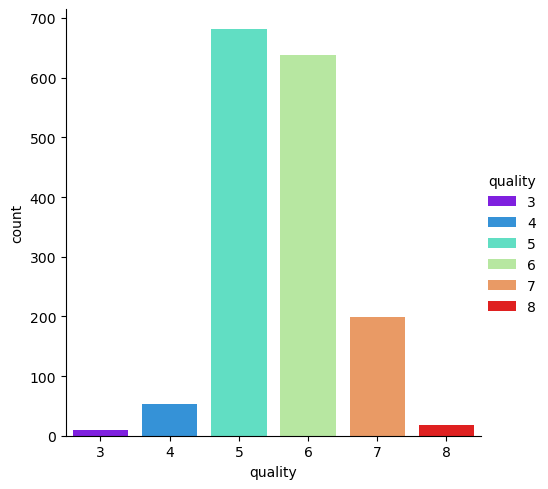

In [153]:
sns.catplot(data=wine_df, x='quality', kind='count', hue='quality', palette='rainbow');

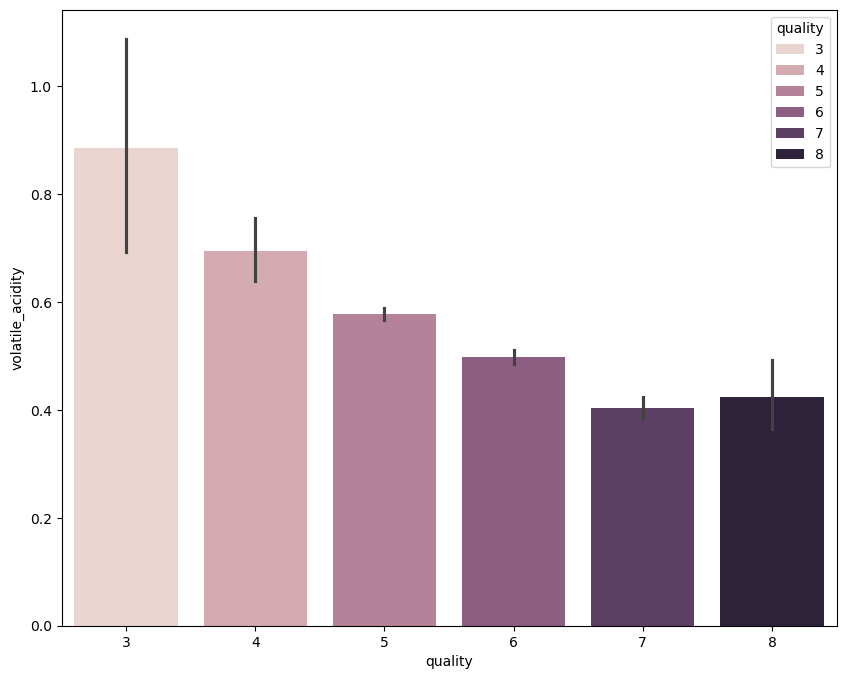

In [154]:
# Volatile acidity vs Quality
plot = plt.figure(figsize=(10, 8))
sns.barplot(x='quality', y='volatile_acidity', data=wine_df, hue='quality');

In [155]:
plot = plt.figure(figsize=(10, 8))
sns.barplot(x='quality', y='citric acid', data=wine_df, hue='quality');

ValueError: Could not interpret value `citric acid` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x800 with 0 Axes>

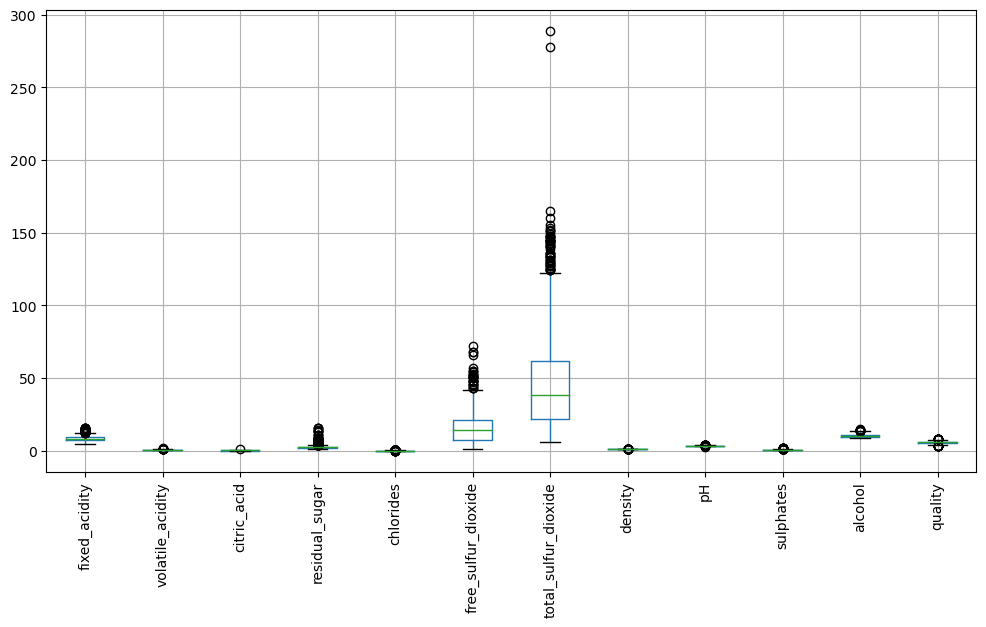

In [ ]:
#Create a boc plot to visualize outliers in the numerical cols
numerical_data = wine_df.select_dtypes(exclude=object)
numerical_data
cols = [col for col in numerical_data]
numerical_data.boxplot(figsize=(12,6), column=cols)
plt.xticks(rotation=90)
plt.show();

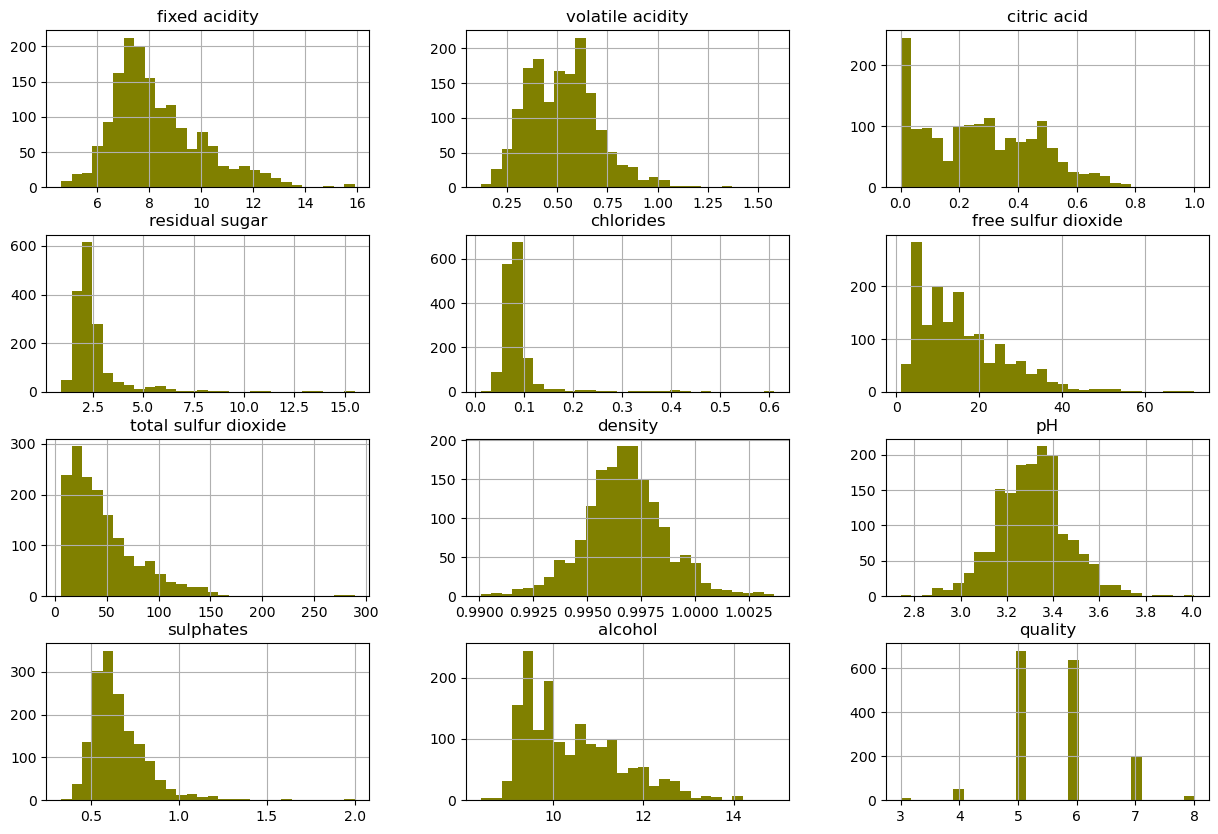

In [ ]:
wine_df.hist(bins = 28, figsize=(15, 10), color ='olive')
plt.show();

In [ ]:
def get_and_remove_outliers(cols, df):
    for col in cols:
        lower_limit, upper_limit = df[col].quantile([0.05, 0.95])
        print(f'lower_limit: {lower_limit}')
        print(f'upper limit: {upper_limit}')

        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return  df

In [158]:
def get_and_remove_outliers_IQR(cols, df):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        print(f'Upper limit: {upper_limit}')
        print(f'Lower limit: {lower_limit}')

        df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]
    return df


In [159]:
numerical_cols = [col for col in wine_df.select_dtypes(exclude='object') if col != 'quality']
numerical_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [160]:
wine_df = get_and_remove_outliers_IQR(numerical_cols, wine_df)
wine_df

Upper limit: 12.349999999999998
Lower limit: 3.95
Upper limit: 1.0075
Lower limit: 0.027500000000000024
Upper limit: 0.8899999999999999
Lower limit: -0.3899999999999999
Upper limit: 3.6500000000000004
Lower limit: 0.8499999999999996
Upper limit: 0.11749999999999998
Lower limit: 0.04150000000000002
Upper limit: 40.5
Lower limit: -11.5
Upper limit: 113.375
Lower limit: -31.625
Upper limit: 1.0005450000000002
Lower limit: 0.9924249999999999
Upper limit: 3.6800000000000006
Lower limit: 2.96
Upper limit: 0.94375
Lower limit: 0.3137500000000001
Upper limit: 13.25
Lower limit: 7.25


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


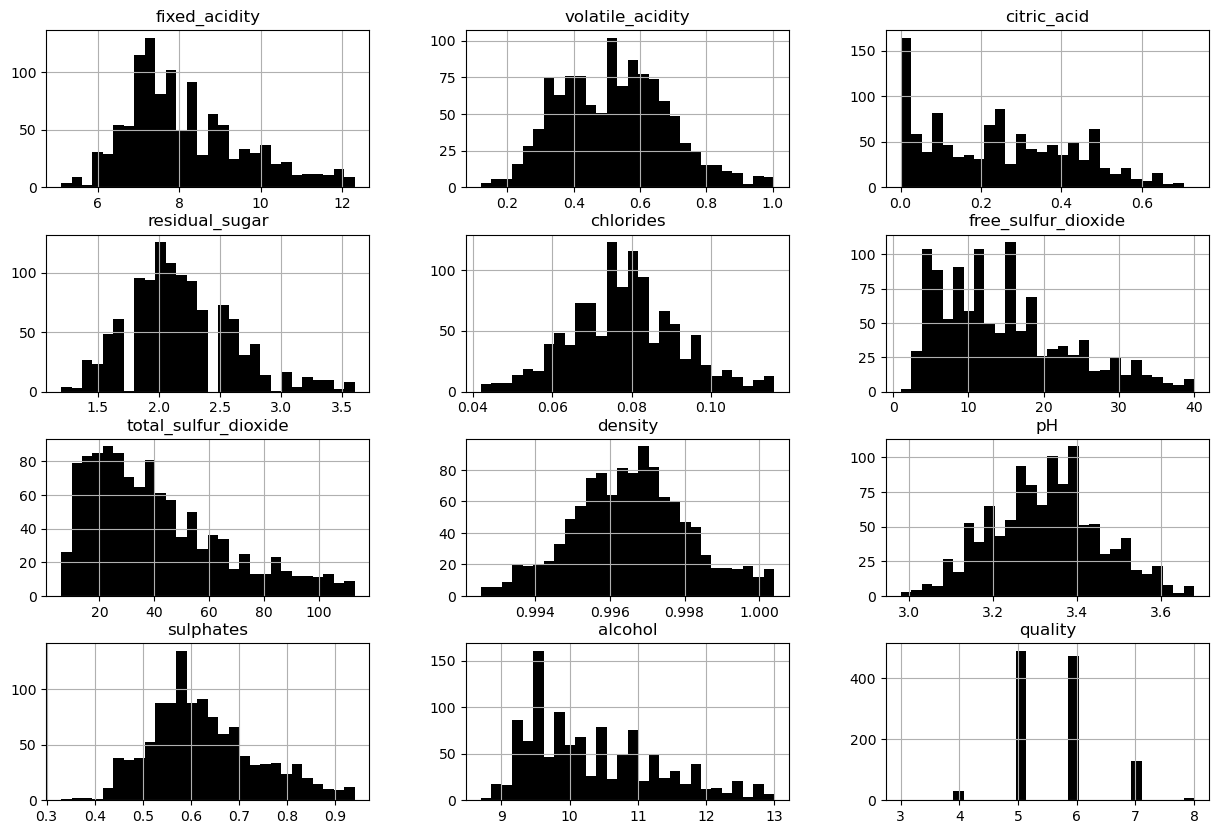

In [161]:
wine_df.hist(bins=28, color='black', figsize=(15,10));

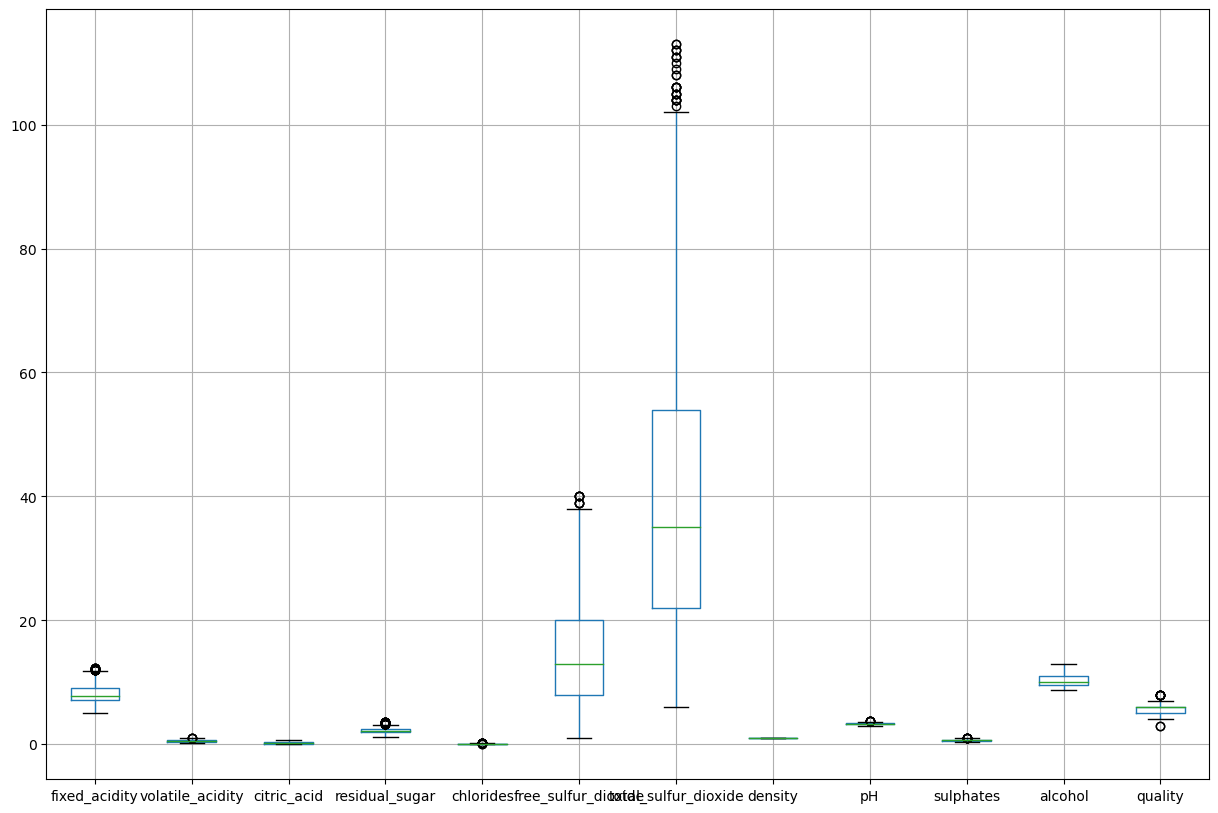

In [162]:
wine_df.boxplot(figsize=(15, 10));

In [163]:
# Correlation
correlation = wine_df.corr()

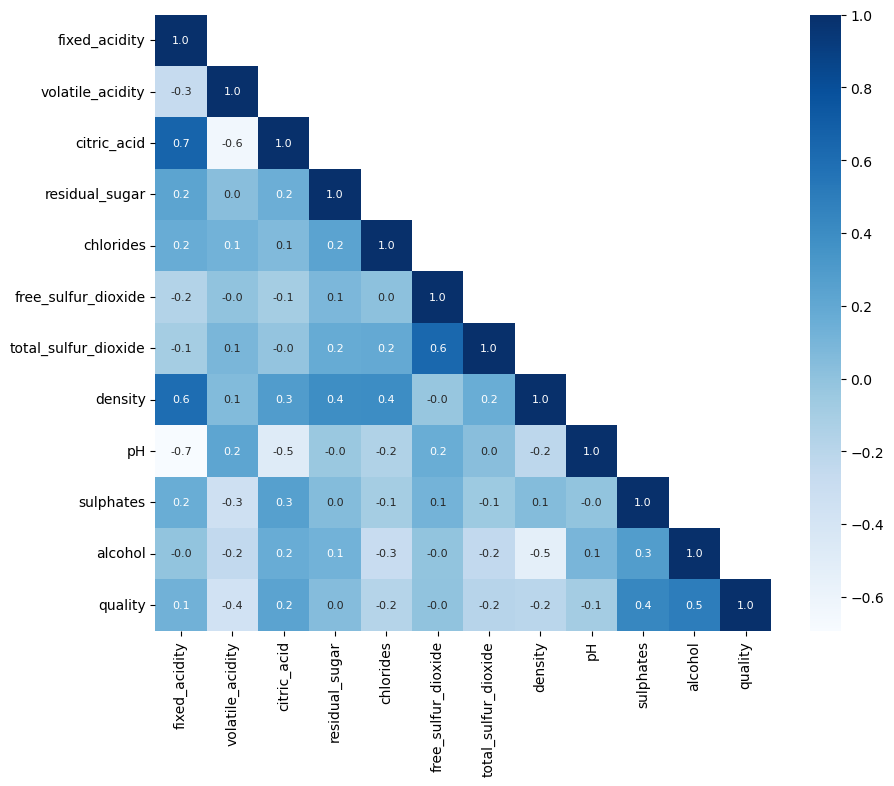

In [164]:
plt.figure(figsize=(10,8))
mask = ~np.tri(correlation.shape[0], dtype=bool, k=0)
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues', mask=mask);

### DATA PROCESSING

In [165]:
X = wine_df.drop('quality', axis=1)

### LABEL BINARIZATION/ENCODING

In [166]:
y = wine_df['quality'].apply(lambda x: 1 if x >= 7 else 0)
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1135, dtype: int64

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [168]:
model = RandomForestClassifier()

In [169]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [170]:
X_train_pred = model.predict(X_train)
X_train_accuracy = accuracy_score(X_train_pred, y_train)
X_train_accuracy

1.0

In [171]:
X_test_pred = model.predict(X_test)
X_test_accuracy = accuracy_score(X_test_pred, y_test)
X_test_accuracy

0.9162995594713657

#### PREDICTION TEST


In [172]:
input_data = (7.3, 0.65, 0.0, 1.2, 0.065, 15.0, 21.0, 0.9946, 3.39, 0.47, 10.0)

In [173]:
input_data_as_np = np.asarray(input_data).reshape(1, -1)

In [174]:
input_data_as_np

array([[ 7.3   ,  0.65  ,  0.    ,  1.2   ,  0.065 , 15.    , 21.    ,
         0.9946,  3.39  ,  0.47  , 10.    ]])

In [175]:
model.predict(input_data_as_np)

/home/akeemlag/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])